# **<font color='crimson'>Расчет шкалы значений p-value с помощью метода Монте-Карло и с помощью статистического теста</font>**

---

**Выполнил**: Юмаев Егор

---

**P_value** - это способ противопоставить имеющиеся данные нулевой гипотезе **H0**, рассчитав силу доказательств. **P_value** показывает потенциальный **False Positive Rate**.

Укрупненно схема проверки гипотезы выглядит следующим образом:

(1) формулируем гипотезы **H0** и **H1**

(2) собираем данные

(3) противопоставляем данные и нулевую гипотезу

 - если противоречие между данными и нулевой гипотезой сильное, отвергаем нулевую гипотезу

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from statsmodels.stats.proportion import proportions_ztest

Формулируем гипотезы для проверки монеты на "честность":

* **H0**: монета честная (вероятность выпадения орла 50%)

* **Н1**: монета нечестная (вероятность выпадения орла не равна 50%
)

Гипотеза является **двусторонней**.

Моделируем случайную величину, распределенную биномиально. В каждом эксперименте определим 10 исходов.

In [2]:
np.random.seed(1)

np.random.binomial(10, 0.5)

5

## <font color='green'>**1 P-value для случая выпадения 7 "орлов" из 10 бросков монеты**</font>

---

Ситуация **7 "орлов" из 10 бросков монеты** для двусторонней гипотезы эквивалентна ситуации **3 "орла" из 10 бросков монеты**. В случаях выпадения количества орлов, большего 7 или меньшего 3, отклонение от идеального значения, соответствующего **H0** (5) составит по модулю >= 2.

In [3]:
# проведем 10_000 запусков экспериментов
n = 10_000
result = []

for i in tqdm(range(n)):
    np.random.seed(i) # обеспечение воспроизводимости каждого эксперимента
    result.append(np.random.binomial(10, 0.5))

  0%|          | 0/10000 [00:00<?, ?it/s]

In [4]:
# сохраняем результаты в датафрейм
df = pd.DataFrame(result)

In [5]:
# выведем первые пять строк датасета с результатами
df.head()

,0
0,5
1,5
2,5
3,5
4,8


Каждая строка датасета **df** - это количество положительных исходов в отдельно взятом эксперименте. Всего смоделировано 10_000 экспериментов.

Вычислим реальное значение **p-value** (потенциальный **False Positive Rate**) для порога **2**.

Наиболее подходящим значением, соответствующим гипотезе **H0**, является **5**. Поэтому, вычисляя отклонение будем из полученного количества положительных исходов каждого эксперимента вычитать 5 и брать модуль полученного отклонения.

In [6]:
# вычислим отклонения для каждого из серии экспериментов
df['deviation'] = abs(df[0] - 5)

In [7]:
# выведем первые пять строк датасета с результатами
df.head()

,0,deviation
0,5,0
1,5,0
2,5,0
3,5,0
4,8,3


Вычислим, в скольки % случаев отклонение больше или равно 2 (двум):

In [8]:
(df['deviation'] >= 2).mean()

0.3515

При пороге отклонения **>= 2** величина **False Positive Rate (p_value)** составляет **0.3515**.

**False Positive Rate** можно рассчитать и для других порогов. Для рассматриваемых гипотез о "честности" монеты число таких порогов конечно и невелико: 0, 1, 2, 3, 4, 5. Числа [0, 1, 2, 3, 4, 5] - это количество отклонений в "орлах". Всех этих "орлов" мы можем пeревести в **p_value**. Будет получена **шкала**: по выпавшему значению мы вычисляем соответствующее ему **p_value**.

## <font color='green'>**2 Шкала значений p_value для различных пороговых уровней гипотезы о проверке монеты на честность (метод Монте-Карло)**</font>

---

In [9]:
# создаем список всех возможных отклонений
devs = [0, 1, 2, 3, 4, 5]

In [10]:
# расчитываем значение p_value
# для каждого порогового уровня
result = []

for dev in devs:
    result.append((dev, (df['deviation'] >= dev).mean()))

In [11]:
# сохраним результаты в датафрейм
pvals = pd.DataFrame(result, columns = ['heads', 'p_value'])

In [12]:
# выведем значение p_value для каждого порога
pvals

,heads,p_value
0,0,1.0000
1,1,0.7573
2,2,0.3515
3,3,0.1124
4,4,0.0229
5,5,0.0009


Полученная шкала позволяет проанализировать ошибку первого рода и принять решение о принятии или отклонении гипотезы.

## <font color='green'>**3 Шкала значений p_value для различных пороговых уровней гипотезы об удовлетворенности пользователей услугами сервиса (метод Монте-Карло)**</font>

---

В связи с увеличением числа негативных отзывов клиентов сервиса выдвинуты гипотезы:

* **Н0**: удовлетворенность клиентов услугами сервиса составляет 80%

* **Н1**: удовлетворенность клиентов услугами сервиса меньше 80%

Гипотеза **Н1** является **односторонней**.



На этапе планирования эксперимента было установлено соответствие между желаемыми значениями метрик A/B-теста и размером выборки и пороговым значением отклонения.

Установлено, что пороговое значение отклонения составляет **<= -8**, а размер выборки **115**.

Рассчитаем первое пороговое значение, учитывая, что:

* размер выборки равен **115**

* уровень удовлетворенности, соответствующий гипотезе **Н0** равен **80%**

* начальное пороговое отклонение составляет **<= -8**.

In [13]:
# зададим размер выборки
sample_size = 115

Обратим внимание, что первым аргументом функции np.random.binomial() будет значение **115**, полученное на этапе предварительных расчетов при планировании A/B-теста.

In [14]:
# проведем 10_000 запусков экспериментов
n = 10_000
result = []

for i in tqdm(range(n)):
    np.random.seed(i) # обеспечение воспроизводимости каждого эксперимента
    result.append(np.random.binomial(115, 0.8))

  0%|          | 0/10000 [00:00<?, ?it/s]

In [15]:
# сохраняем результаты в датафрейм
df = pd.DataFrame(result)

In [16]:
# выведем первые пять строк датасета с результатами
df.head()

,0
0,92
1,93
2,93
3,92
4,84


Вычислим, при каком количестве клиентов количество довольных точно соответствует гипотезе **Н0**:

In [17]:
int(sample_size * 0.8)

92

92 довольных клиента из 115 - это идеальный результат, дающий отклонение от нормы, равное 0 (ноль).

При расчете отклонений для одностороннего теста избавляться от знака для каждого отклонения (с помощью модуля) не нужно, т.к. нас интересуют отклонения в меньшую сторону.

In [18]:
# вычислим отклонения для каждого из серии экспериментов
df['deviation'] = df[0] - sample_size * 0.8

In [19]:
# выведем первые десять строк датасета с результатами
df.head(10)

,0,deviation
0,92,0.0
1,93,1.0
2,93,1.0
3,92,0.0
4,84,-8.0
5,95,3.0
6,87,-5.0
7,98,6.0
8,87,-5.0
9,101,9.0


Отклонения, которые нам необходимо посчитать, охватывают диапазон **<= -8**. Первое отклонение соответствует пороговому значению **84**. Следовательно, шкала для расчета p_value включает значения [-8 - 84; -8] с шагом 1. Всего таких значений 92.

In [20]:
# создаем список всех возможных отклонений
devs = range(0, int(sample_size * 0.8) + 1)

Для **одностороннего теста**, проверяеющего, что значение может быть меньше установленного (желаемого) сравнение отклонения с пороговым уровнем проходит иначе, чем при **двустороннем** тесте. Для рассматриваемого случая важно "отловить" те значения, которые отклоняются в меньшую сторону.

In [21]:
# расчитываем p_value
# для каждого порогового уровня
result = []

for dev in devs:
    result.append((dev, (df['deviation'] <= - dev).mean()))

In [22]:
# сохраним результаты в датафрейм
pvals = pd.DataFrame(result, columns = ['people', 'p_value'])

In [23]:
# выведем значение p_value для каждого порога
pvals.head()

,people,p_value
0,0,0.5348
1,1,0.4498
2,2,0.3632
3,3,0.2777
4,4,0.2067


In [24]:
# выведем значение p_value для отклонения, равного 8
pvals[8:9]

,people,p_value
8,8,0.0437


Поясним результат для порога **-8** и соответствующее ему значение **p_value = 0.0437**: если бы мы взяли значение **-8** как пороговое и при нем отвергали **H0** о том, что удовлетворенность клиентов равна 80%, то мы бы совершили **ошибку 1-го рода** в 4.3% случаев.

Т.к. получено много пороговых значений, изобразим зависимость **pvalue** от соответствующего порогового значения на графике.

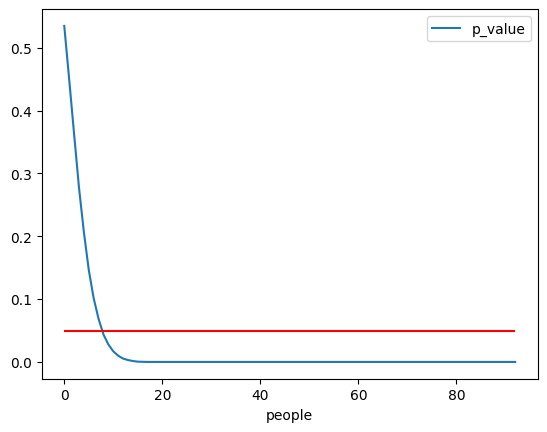

In [25]:
pvals.set_index('people').plot()
plt.hlines(
    y=0.05,
    colors='r',
    xmin=0,
    xmax=int(sample_size * 0.8),
    linestyles='-',
    label='Significance (alpha)')
plt.show()

По графику видно, что примерно после 18-го порогового уровня **p_value** достигает нуля и с увеличением порога на меняется.

In [26]:
# выведем первые 18 значений результата p_value
# в зависимости от порога
pvals.head(18)

,people,p_value
0,0,0.5348
1,1,0.4498
2,2,0.3632
3,3,0.2777
4,4,0.2067
5,5,0.1464
6,6,0.1013
7,7,0.0685
8,8,0.0437
9,9,0.0277


По таблице можно сделать вывод, что если бы мы в качестве порогового выбрали, например, значение **2** (два), то вероятность **ошибки первого рода** была бы 36.3%

## <font color='green'>**4 Расчет p_value с помощью статистического теста**</font>

---

Рассчитаем p_value для одностороннего теста из п. 3 (об удовлетворенности клиентов услугами сервисной компании). Возьмем порог, равный **-8**. Ему соответствуют следующие параметры, передаваемые в **proportions_ztest**:

**1 параметр**: необходимо передать количество клиентов, которые удовлетворены услугами сервиса (84)

**2 параметр**: количество клиентов, которых необходимо обзвонить, чтобы узнать их мнение об услугах сервиса (115)

**3 параметр**: уровень удовлетворенности пользователей услугами сервиса, соответствующий нулевой гипотезе (0.8)

**4 параметр**: указывется альтернатива. По умолчанию **alternative='two-sided'**. Для одностороннего теста, оценивающего, что значение может быть меньше выбранного, необходимо указать **alternative='smaller'**



In [27]:
proportions_ztest(84, 115, 0.8, alternative='smaller')

(-1.6811962678215244, 0.046362399106540116)

С помощью статистического теста получено значение **p_value = 0.0463**. Оно близко к значению **p_value**, полученного с помощью метода Монте-Карло (**0.0437**).

Между методом Монте-Карло и математическими моделями всегда будут расхождения. У математических моделей есть ряд требований к тому, чтобы их можно было применять.

Дополнительно рассчитаем **шкалу** для **одностороннего** теста об уровне удовлетворенности клиентов услугами сервиса, и сравним результаты, полученные с помощью метода Монте-Карло и статистического метода.

Датасет **pvals** содержит результаты расчета **p_value** для разных пороговых уровней с помощью метода **Монте-Карло**. Расчет **p_value** для аналогичных пороговых уровней с помощью **статистического теста** добавим в качестве 3-го столбца датасета.

In [28]:
# рассчитаем p_value для каждого порогового уровня
# из датасета pvals с помощью статистического теста
pvals['pval_ztest'] = pvals['people'].apply(
    lambda x: proportions_ztest(92 - x, 115, 0.8, alternative='smaller')[1])

Сравним на графике, насколько сильно отличаются значения **p_value**, полученные с помощью метода Монте-Карло и с помощью статистического теста, для идентичных пороговых значений

In [29]:
# выведем первые пять строк с результатами
pvals.head()

,people,p_value,pval_ztest
0,0,0.5348,0.500000
1,1,0.4498,0.409252
2,2,0.3632,0.325579
3,3,0.2777,0.251815
4,4,0.2067,0.189428


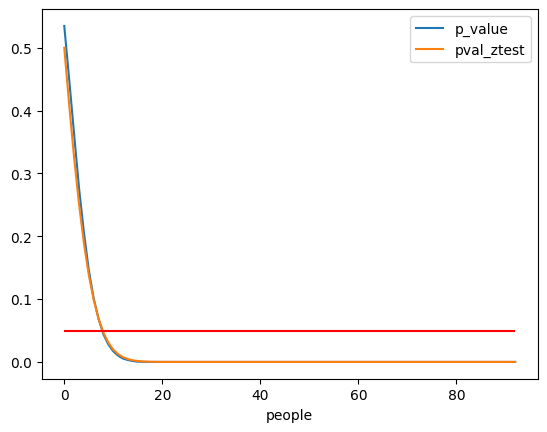

In [30]:
# совместим на одном графике результаты расчета p_value
# с помощью метода Монте-Карло
# и с помощью статистического теста
pvals.set_index('people').plot()
plt.hlines(
    y=0.05,
    colors='r',
    xmin=0,
    xmax=int(sample_size * 0.8),
    linestyles='-',
    label='Significance (alpha)')
plt.show()

Результаты расчета **p_value**, полученные с помощью **метода Монте-Карло** и с помощью **статистического теста** практически идентичны. Небольшое различие зафиксировано только для самого первого порога, при котором удовлетворенность клиентов услугами сервиса точно соответствует значению из **Н0**.